In [47]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns 
from keras.initializers import RandomNormal

In [49]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))


Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [50]:
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))


Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [51]:
#example
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [52]:
X_train = X_train/ 255
X_test = X_test/ 255
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
#using one hot encoding  to convert y class in to 10D vector
print("y class label",y_train[0])
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)
print("after converting ",y_train[0])

y class label 5
after converting  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [54]:
# building model 
from keras.models import Sequential
from keras.layers import Dense,Activation

In [55]:
#parameter initialiszation
output_dim=10
input_dim=X_train.shape[1]
batch_size=128
nb_epoch=20

<h2>  
Buidling a Multi-Layered Perceptron with 5 hidden Layers
  </h2>


 <h2> MLP+ReLU+Adam</h2>



In [57]:

model_relu = Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
#model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3010      
Total params: 654,310
Trainable params: 654,310
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.1936 - accuracy: 0.9416 - val_loss: 0.0956 - val_accuracy: 0.9706
Epoch 2/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 3/20
60000/60000 [=

In [74]:
score=model_relu.evaluate(X_test,y_test,verbose=0)
print("test score",score[0])
print("test accuracy",score[1])

test score 0.06855784090408285
test accuracy 0.9842000007629395


In [94]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


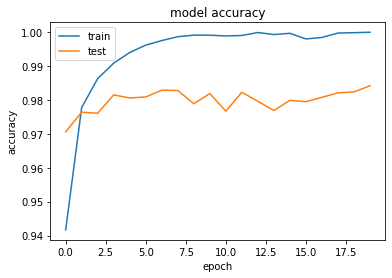

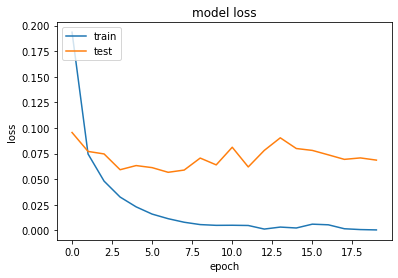

In [96]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

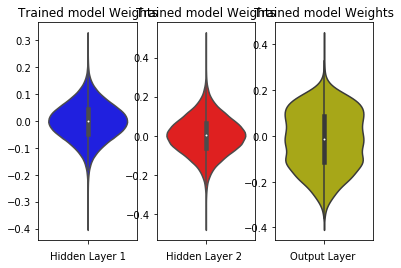

In [97]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP+Adam+ReLu+Batch Normalization on Hidden layers</h2>

In [98]:

model_relu_bn = Sequential()
model_relu_bn.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu_bn.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu_bn.add(BatchNormalization())
model_relu_bn.add(Dense(output_dim, activation='softmax'))

print(model_relu_bn.summary())

model_relu_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_relu_bn.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_17 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                3010      
Total params: 655,510
Trainable params: 654,910
Non-trainable params: 600
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.1805 - accuracy: 0.9453 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 2/20
60000/60000 [================

In [100]:
score=model_relu_bn.evaluate(X_test,y_test,verbose=0)
print("test score",score[0])
print("test accuracy",score[1])

test score 0.07280466332166816
test accuracy 0.9830999970436096


In [102]:
print(history_1.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


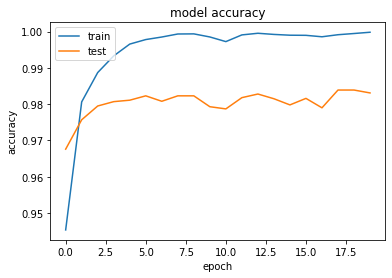

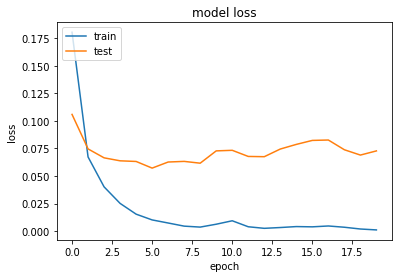

In [103]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

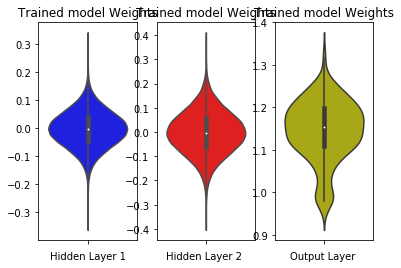

In [104]:
w_after = model_relu_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP+Adam+ReLu+Batch Normalization on Hidden layers+dropouts</h2>

In [106]:

model_relu_2bdr = Sequential()
model_relu_2bdr.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu_2bdr.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu_2bdr.add(BatchNormalization())
model_relu_2bdr.add(Dropout(0.5))

model_relu_2bdr.add(Dense(output_dim, activation='softmax'))

print(model_relu_2bdr.summary())

model_relu_2bdr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_relu_2bdr.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_23 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                3010      
Total params: 655,510
Trainable params: 654,910
Non-trainable params: 600
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] -

In [158]:
score1=model_relu_2bdr.evaluate(X_test,y_test,verbose=0)
print("test score",score[0])
print("test accuracy",score[1])

test score 0.08274517811252735
test accuracy 0.9797000288963318


In [164]:
score2=model_relu_2bdr.evaluate(X_train,y_train,verbose=0)
print("train score",score2[0])
print("train accuracy",score2[1])

train score 0.0017135630338909324
train accuracy 0.9995499849319458


In [109]:
print(history_2.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


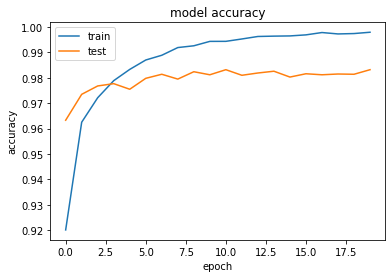

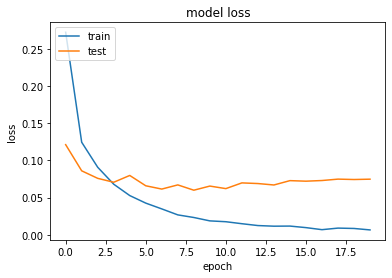

In [110]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

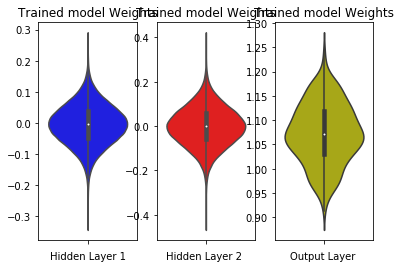

In [111]:
w_after = model_relu_2bdr.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP+Adam+ReLu+Batch Normalization on Hidden layers 5layers+dropouts</h2>

In [114]:

model_relu_5 = Sequential()
model_relu_5.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.11, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.16, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(37, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.23, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(output_dim, activation='softmax'))
print(model_relu_5.summary())
model_relu_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_relu_5.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 150)             

In [162]:
score3=model_relu_5.evaluate(X_test,y_test,verbose=0)
print("test score",score[0])
print("test accuracy",score[1])


test score 0.08274517811252735
test accuracy 0.9797000288963318


In [259]:
score4=model_relu_5.evaluate(X_train,y_train,verbose=0)
print("train log loss",score4[0])
print("train accuracy",score4[1])

train log loss 0.032480806072215394
train accuracy 0.9920499920845032


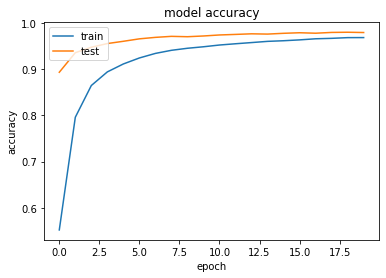

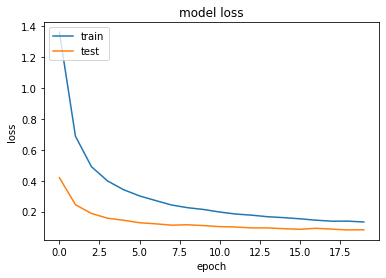

In [116]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

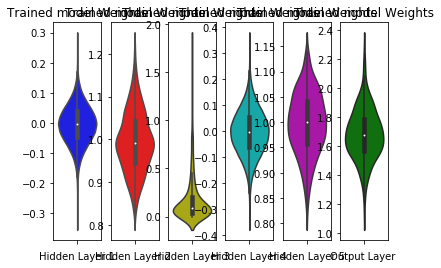

In [117]:
w_after = model_relu_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer ')
plt.show()

In [199]:
train_loss_list =[];
test_loss_list =[];
train_accuracy_list =[];
test_accuracy_list = [];

In [265]:
#reporting the results in a table
order_list = [0,1,2]
hidden_layers_list =[2,5]

for i in order_list:
  t= PrettyTable()
  t.field_names =["metric/parameter" , "result"]
  t.add_row (["Model" ,"Classification"])
  t.add_row(["Algorithm","MLP"])
  t.add_row (["Hidden-layers" ,hidden_layers_list[i]])
  t.add_row(["Activation","Relu"])
  t.add_row(["optimizer","Adam"])
  t.add_row(["Batch-Normalization","Yes"])
  t.add_row(["Dropout","Yes"])
  t.add_row (["Train-logloss" ,(train_loss_list[i])])
  t.add_row (["Test-logloss" ,(test_loss_list[i])])
  t.add_row(["Train-accuracy",(train_accuracy_list[i])])
  t.add_row(["Test-accuracy",(test_accuracy_list[i])])
  print(t)

+---------------------+-------------------------+
|   metric/parameter  |          result         |
+---------------------+-------------------------+
|        Model        |      Classification     |
|      Algorithm      |           MLP           |
|    Hidden-layers    |            2            |
|      Activation     |           Relu          |
|      optimizer      |           Adam          |
| Batch-Normalization |           Yes           |
|       Dropout       |           Yes           |
|    Train-logloss    | [0.0017135630338909324] |
|     Test-logloss    |  [0.07469249002708066]  |
|    Train-accuracy   |   [0.9995499849319458]  |
|    Test-accuracy    |   [0.9832000136375427]  |
+---------------------+-------------------------+
+---------------------+------------------------+
|   metric/parameter  |         result         |
+---------------------+------------------------+
|        Model        |     Classification     |
|      Algorithm      |          MLP           |
|    

IndexError: list index out of range